# Contents

- ## Univariate Linear Regression from Scratch
    - ### Imports
    - ### Fetch the Data
    - ### Visualize the Data
    - ### Cost Function
    - ### "Batch" Gradient Descent
    - ### Run our Linear Regression Algorithm
    - ### Predicting using our model

## Univariate Linear Regression from Scratch

### Imports

In [11]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

# Visualize plots inline
%matplotlib inline

In [12]:
# Setting up plotly
print(__version__) # requires version >= 1.9.0


# For Notebooks
init_notebook_mode(connected=True)

# For offline use
cf.go_offline()

3.10.0


### Fetch the Data

In [6]:
file = "https://raw.githubusercontent.com/ManojKumarTiwari/LinearRegression/master/ex1data1.txt"

df = pd.read_csv(file, header=None)

In [7]:
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Visualize the Data

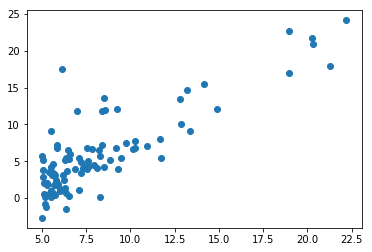

In [64]:
plt.scatter(df[0], df[1])

In [21]:
df.iplot(kind='scatter',x=0,y=1,mode='markers')

### Cost Function

<img src="../important_guide_images/LinearRegression.PNG"/>

In [59]:
# Cost Function
def cost_function(m, b, x, y):
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i]-(m*x[i]+b))**2
    return totalError/float(len(x))

### "Batch" Gradient Descent

<img src="../important_guide_images/BatchGradientDecent.PNG"/>

In [60]:
# Implementation of the gradient descent algorithm
def gradient_descent(b, m, x, y, learning_rate, num_iterations):
    N = float(len(x))
    # repeat for num_iterations
    for j in range(num_iterations): 
        b_gradient = 0
        m_gradient = 0
        for i in range(0, len(x)):
            b_gradient += -(2/N) * (y[i] - ((m * x[i]) + b))
            m_gradient += -(2/N) * x[i] * (y[i] - ((m * x[i]) + b))
        b -= (learning_rate * b_gradient)
        m -= (learning_rate * m_gradient)
        # Every 100  iterations we print our error 
        if j%100==0:
            print("MSE after " + str(j) + " iterations: " + str(cost_function(m, b, x, y)))
    return [b, m]

### Run our Linear Regression Algorithm

In [61]:
x = df[0].tolist() # feature variable
y = df[1].tolist() # target variable

# Defining our learning rate
learning_rate = 0.0001

# defining our initial values of b and m
initial_b = 0
initial_m = 0

# Setting how many iterations we wish to run
num_iterations= 1000

print('Initial MSE:', cost_function(initial_m, initial_b, x, y))
[b, m] = gradient_descent(initial_b, initial_m, x, y, learning_rate, num_iterations)
print('b:', b)
print('m:', m)
print('MSE:', cost_function(m, b, x, y))

Initial MSE: 64.14546775491131
MSE after 0 iterations: 62.438833310147984
MSE after 100 iterations: 13.647162061142211
MSE after 200 iterations: 11.856874477942041
MSE after 300 iterations: 11.772277185328516
MSE after 400 iterations: 11.74971565647692
MSE after 500 iterations: 11.729545271169728
MSE after 600 iterations: 11.709600687514836
MSE after 700 iterations: 11.689802332436841
MSE after 800 iterations: 11.670146326729734
MSE after 900 iterations: 11.650631545030615
b: -0.06104372530053788
m: 0.8077926520338518
MSE: 11.631450024036447


### Predicting using our model

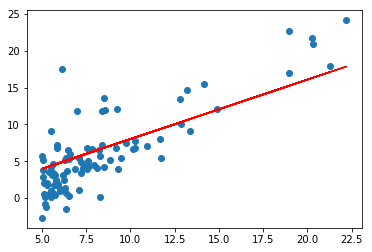

In [62]:
predictions = [(m * x[i]) + b for i in range(len(x))]
plt.scatter(x, y)
plt.plot(x, predictions, color='r')